In [1]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ezephys import pltools

from grr.Tools import stripNan

In [3]:
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'fig1')
NOTEBOOK_PATH = os.path.join('figs', 'scripts', 'writeup')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

In [4]:
data = {
    celltype: pd.read_csv(os.path.join('data', 'processed', celltype, 'transient_current_parameters.csv'))
    for celltype in ['5HT', 'GABA']
}
for celltype in data:
    data[celltype]['cell_type'] = celltype
param_df = pd.concat([data[celltype] for celltype in data], axis=0)
param_df.reset_index(drop=True, inplace=True)

param_df

,inactivation_taus,peak_conductance,peak_latencies,steady_state_amplitudes,steady_state_conductance,cell_type
0,39.280178,12.320388,7.7,97.607349,1.952147,5HT
1,28.866688,18.423373,6.3,107.386440,2.147729,5HT
2,32.445161,18.709428,5.8,170.499481,3.409990,5HT
3,40.782865,17.101626,8.3,220.519097,4.410382,5HT
4,57.185123,25.747945,7.9,155.052318,3.101046,5HT
5,44.690907,19.047869,7.5,62.802801,1.256056,5HT
6,27.602526,14.981558,7.8,151.887616,3.037752,5HT
7,37.392290,21.523440,8.0,160.327488,3.206550,5HT
8,49.518003,11.536979,7.7,89.449190,1.788984,5HT
9,49.753422,21.112850,7.8,167.120445,3.342409,5HT


In [5]:
param_df.groupby('cell_type').mean()

,inactivation_taus,peak_conductance,peak_latencies,steady_state_amplitudes,steady_state_conductance
cell_type,,,,,
5HT,42.868023,18.574293,7.461538,141.791420,2.835828
GABA,234.874073,10.727793,27.200000,164.778356,3.295567


In [6]:
param_df.groupby('cell_type').sem()

,inactivation_taus,peak_conductance,peak_latencies,steady_state_amplitudes,steady_state_conductance
cell_type,,,,,
5HT,2.599209,1.380283,0.207098,12.604453,0.252089
GABA,77.557321,1.349214,6.030903,24.121429,0.482429


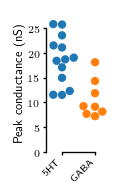

In [7]:
plt.figure(figsize=(1, 1.5))

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.97, bottom=0.2)
plt.ylim(0, 28)
sns.swarmplot('cell_type', 'peak_conductance', data=param_df)
plt.xlabel('')
plt.ylabel('Peak conductance (nS)')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'peak_conductance_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'peak_conductance_comparison.svg'))

In [8]:
stats.mannwhitneyu(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'peak_conductance']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'peak_conductance'])
)

MannwhitneyuResult(statistic=10.0, pvalue=0.001325904680507725)

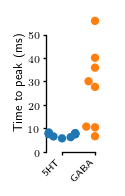

In [9]:
plt.figure(figsize=(1, 1.5))

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.97, bottom=0.2)
plt.ylim(0, 59)
sns.swarmplot('cell_type', 'peak_latencies', data=param_df, clip_on=False)
plt.xlabel('')
plt.ylabel('Time to peak (ms)')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'peak_latency_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'peak_latency_comparison.svg'))

In [10]:
stats.mannwhitneyu(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'peak_latencies']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'peak_latencies'])
)

MannwhitneyuResult(statistic=10.0, pvalue=0.001313179302282101)

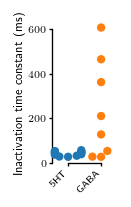

In [11]:
plt.figure(figsize=(1, 1.5))

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.97, bottom=0.2)
plt.ylim(0, 620)
sns.swarmplot('cell_type', 'inactivation_taus', data=param_df, clip_on=False)
plt.xlabel('')
plt.ylabel('Inactivation time constant (ms)')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'inactivation_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'inactivation_comparison.svg'))

In [12]:
stats.mannwhitneyu(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'inactivation_taus']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'inactivation_taus'])
)

MannwhitneyuResult(statistic=26.0, pvalue=0.03239332908931016)

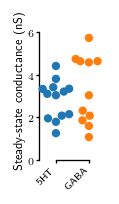

In [13]:
plt.figure(figsize=(1, 1.5))

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.97, bottom=0.2)
plt.ylim(0, 6.5)
sns.swarmplot('cell_type', 'steady_state_conductance', data=param_df, clip_on=False)
plt.xlabel('')
plt.ylabel('Steady-state conductance (nS)')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'steady_state_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'steady_state_comparison.svg'))

In [14]:
stats.mannwhitneyu(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'steady_state_conductance']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'steady_state_conductance'])
)

MannwhitneyuResult(statistic=62.0, pvalue=0.3010340069992075)